In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('/Users/wastechs/Documents/git-repos/energy-efficiency')
from lib.util.helper import query_table, weekday_time_series
import seaborn as sns
import numpy as np
import plotly.express as px
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
df_1T = weekday_time_series(sensor_id='hauptluftung_10T')

In [3]:
px.line(
    x=df_1T.index, y=df_1T.kw, 
    title='Hauptlüftung (Main Ventilation) \n Subsystem = HVAC',
    labels={
        'x': 'Time',
        'y': 'kW'
    })

In [4]:
time_int_range = np.arange(0, df_1T.shape[0]*30, 30)
df_1T['t'] = time_int_range
df_1T['t_scaled'] = (df_1T['t'] - df_1T['t'].min()) / (df_1T['t'].max() - df_1T['t'].min())

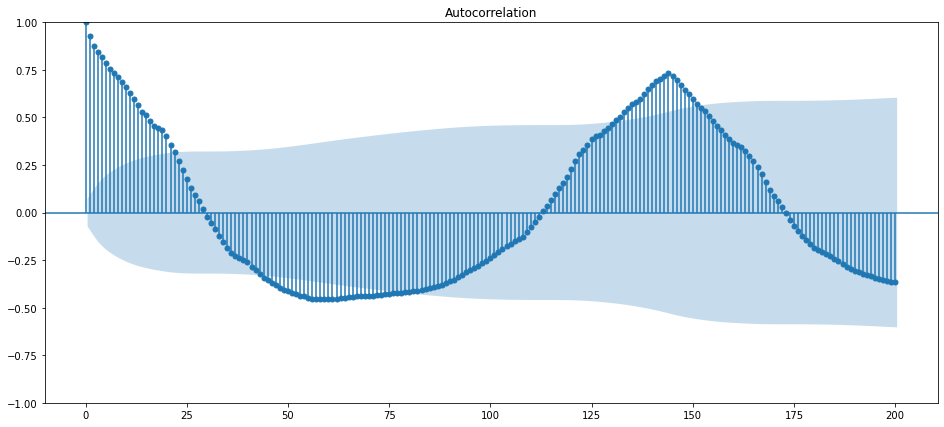

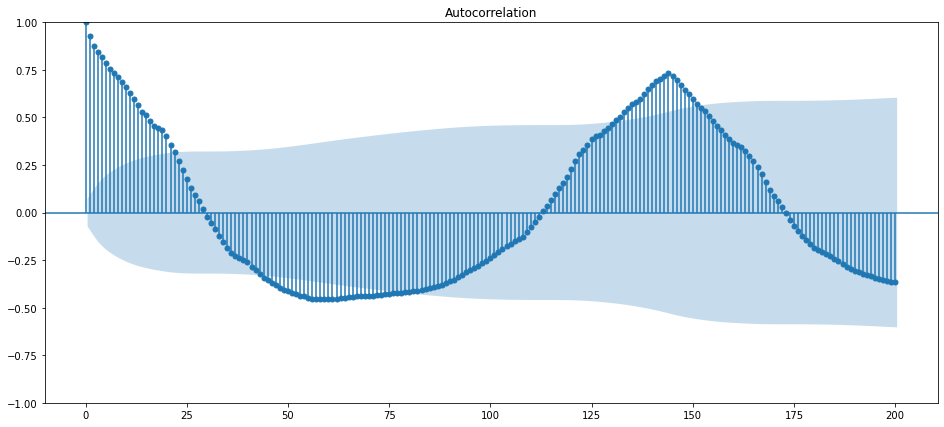

In [5]:
fig, ax = plt.subplots(figsize=(16, 7))
plot_acf(df_1T.kw.values.squeeze(), lags=200, ax=ax)

In [6]:
# Short term interval
df_1T['t_scaled'].iloc[50], df_1T['t_scaled'].iloc[70]

(0.06954102920723226, 0.09735744089012517)

In [7]:
# Long term interval
df_1T['t_scaled'].iloc[130], df_1T['t_scaled'].iloc[150]

(0.1808066759388039, 0.2086230876216968)

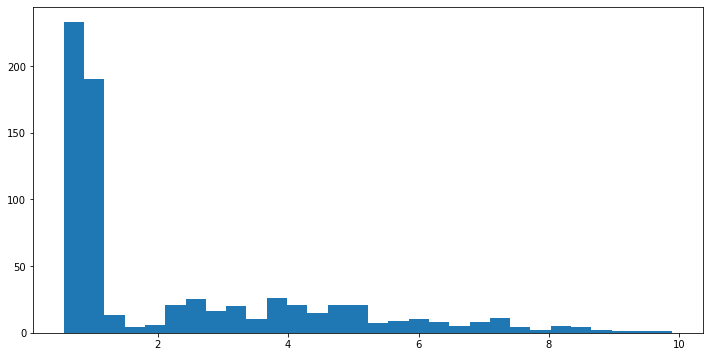

In [8]:
plt.figure(figsize=(12, 6))
plt.hist(x=df_1T.kw, bins=30)
plt.show()

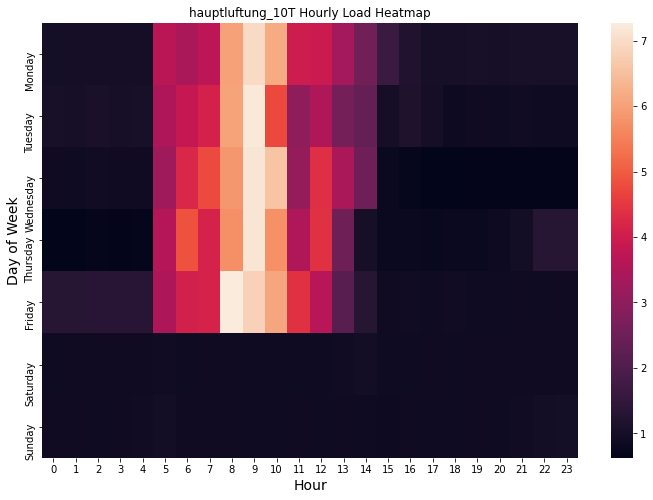

In [9]:
from lib import visualizer
visualizer.hourly_profile_heatmap(machine='hauptluftung_10T')